## Starting with the Project dated 8th of july 2025
# Day 01 -
I will first take the dataset and perform EDA process 
---

In [5]:
import pandas as pd 
import numpy as np

In [6]:
df = pd.read_csv("../data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


-- isnull().sum() this shows how many columns has the values as NaN or null is my case it will show the 0 value 

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [12]:
# this loop i m using to check for the zero values in the columns 
for col in invalid_cols:
    print(f"{col} has {df[df[col] == 0].shape[0]} Zeros values")

Glucose has 5 Zeros values
BloodPressure has 35 Zeros values
SkinThickness has 227 Zeros values
Insulin has 374 Zeros values
BMI has 11 Zeros values


In [13]:
for col in invalid_cols:
    median = df[col].median()
    df[col] = df[col].replace(0 , median)

In [14]:
for col in invalid_cols:
    print(f"{col} has {df[df[col] == 0].shape[0]} zero values")

Glucose has 0 zero values
BloodPressure has 0 zero values
SkinThickness has 0 zero values
Insulin has 0 zero values
BMI has 0 zero values


In [15]:
df.to_csv("../data/diabetes_cleaned.csv" , index = False)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("../data/diabetes_cleaned.csv")

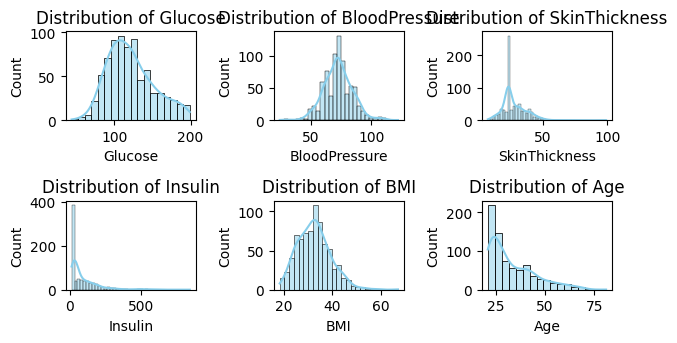

In [18]:
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

# ploting histogram 
for i , col in enumerate(features):
    plt.subplot(3,3, i + 1 )
    sns.histplot(df[col],kde=True ,color="skyblue")
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

-- Checking COrrelation between the features 

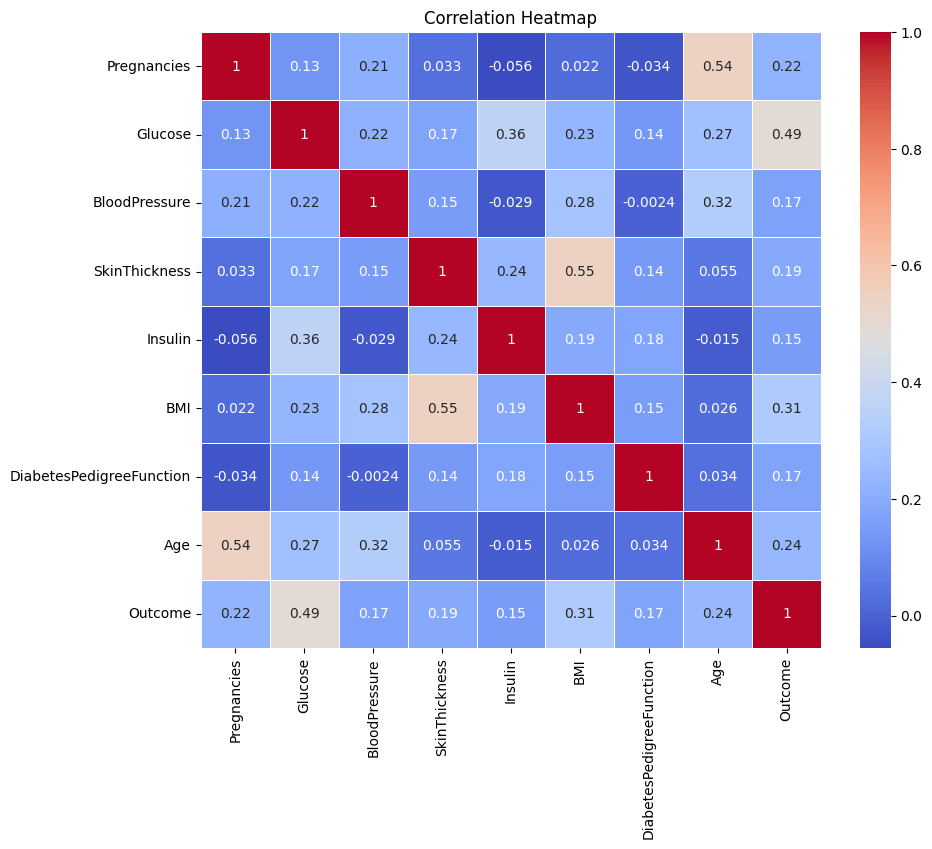

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Error and new learning
-- sns.kdeplot(df[df['Outcome']==0][col], label='No Diabetes', shade=True)
    sns.kdeplot(df[df['Outcome']== 1][col] , label="Diabetes", shade=True)

    this line is showing a warnig as the shade parameter is now changed to fill and is deprecated in the seaborn v0.14.0  

---
-- `shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.  hence this error is coming and i will change the shape parameter with fill 

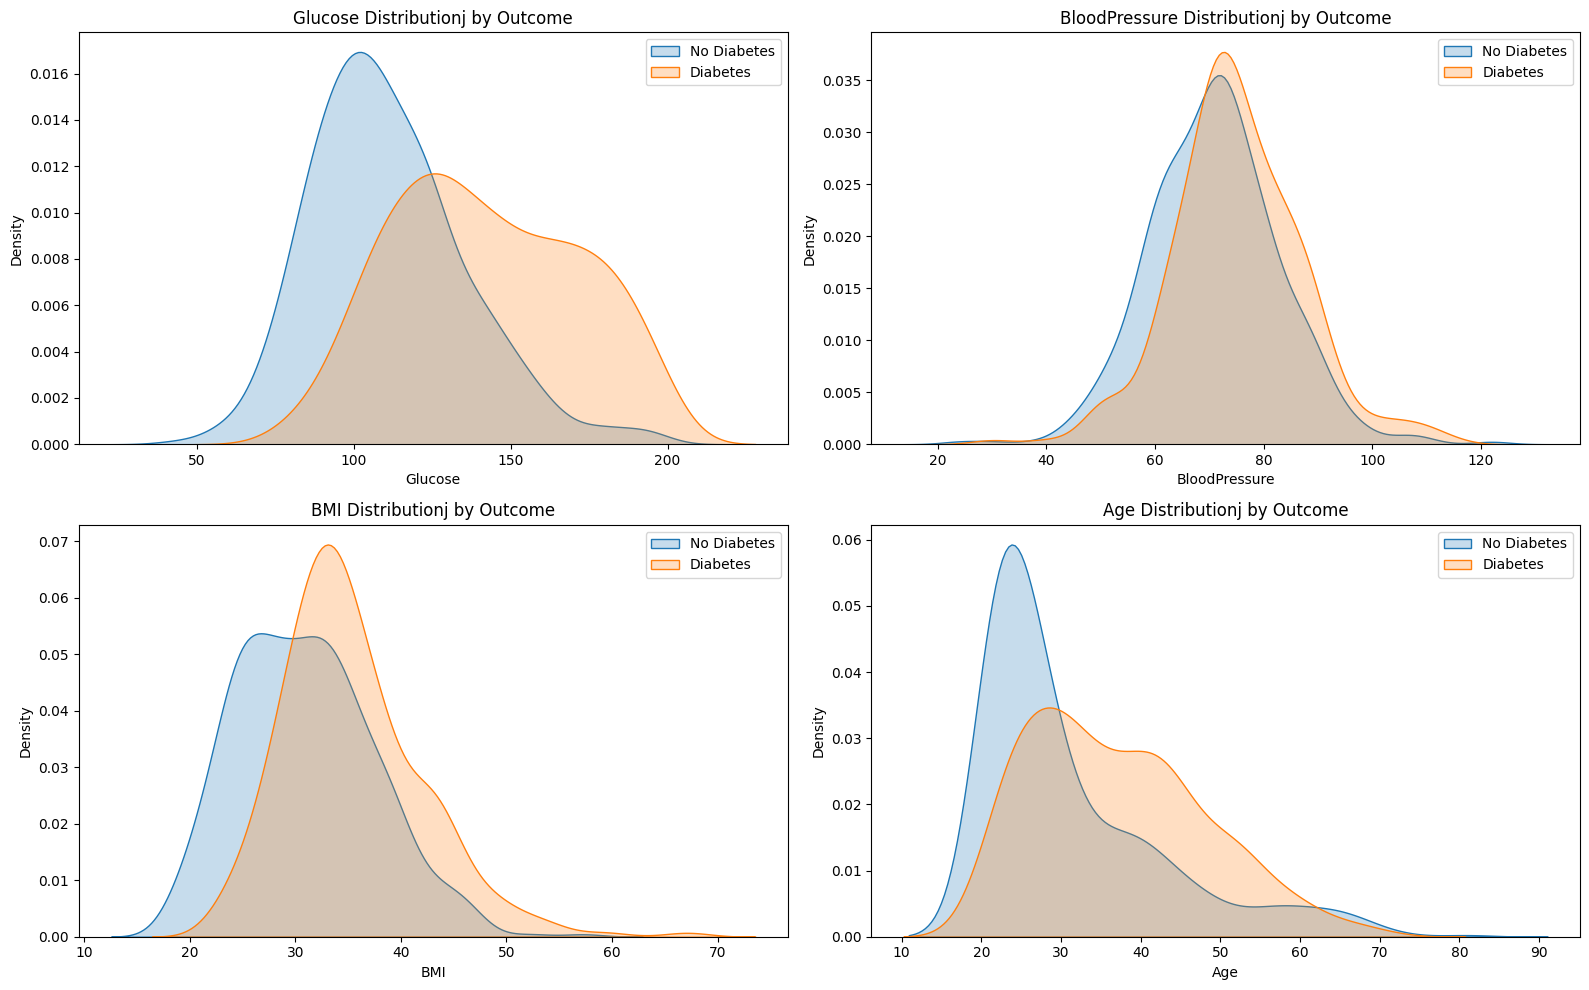

In [20]:
features = ['Glucose', 'BloodPressure', 'BMI', 'Age']
plt.figure(figsize=(16,10))   # just to increase the size of the figure 
for i , col  in enumerate (features):
    plt.subplot(2,2,i+1)
    sns.kdeplot(df[df['Outcome']==0][col], label='No Diabetes', fill=True)
    sns.kdeplot(df[df['Outcome']== 1][col] , label="Diabetes", fill=True)
    plt.title(f'{col} Distributionj by Outcome')
    plt.legend()
    
plt.tight_layout()
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

x = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# converting back to dataframe
x = pd.DataFrame(X_scaled,columns=x.columns)



In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("Trainig Shape: ", x_train.shape)
print("Testing Shape: ", x_test.shape)

Trainig Shape:  (614, 8)
Testing Shape:  (154, 8)


In [23]:
np.save("../data/x_train.npy" ,x_train)
np.save("../data/x_test.npy" ,x_test)
np.save("../data/y_train.npy" ,y_train)
np.save("../data/y_test.npy" , y_test)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt 
import seaborn as sns


- First training the logistic Regression

In [25]:
log_model = LogisticRegression(max_iter= 1000)
log_model.fit(x_train, y_train)

y_pred = log_model.predict(x_test)



- Second training on Random Forest 

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)


- Train on XGBoost

In [27]:
xgb_model =  XGBClassifier(use_label_encoder=False, eval_matric='logloss')
xgb_model.fit(x_train, y_train )

y_pred_xgb = xgb_model.predict(x_test)
